# Vectorization and Topic Analysis

In this notebook, we use sklearn's tf-idf vectorizer on our restaurant and business review corpus and perform topic analysis on the reviews.

## Import the modules and data

In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import textacy
import pickle
import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD

In [3]:
with open('../data/tokenized.pkl', 'rb') as f:
    rests = pickle.load(f)

In [ ]:
with open('../data/tokenized_bs.pkl', 'rb') as bus:
    businesses = pickle.load(bus)

## Build the custom vectorizer

Since I previously used spacy to tokenize the restaurant reviews, I can't use the default tf-idf vectorizer from sklearn since by default the vectorizer incorporates an analyzer, tokenizer, and preprocessor; we've already done the tokenizer and preprocessing in Notebook 2. I will need to construct a custom vectorizer using the tf-idf framework to vectorize our text for topic analysis.

In [4]:
def identity(doc):
    return doc

In [5]:
vectorizer = TfidfVectorizer(analyzer='word', 
                             tokenizer=identity, 
                             preprocessor=identity, 
                             token_pattern=None,
                             strip_accents='ascii',
                             min_df=5, 
                             max_df=0.95, 
                             max_features=100000)

## Create document-term matrices for the two review corpora

In [6]:
%%time
doc_term_matrix = vectorizer.fit_transform((doc for doc in rests))

CPU times: user 1min 24s, sys: 2.36 s, total: 1min 27s
Wall time: 1min 27s


## Create topic models and print out topics

Let's compare the topic generation of three decomposition models: Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), and non-Negative Matrix Factorization (NMF). Theoretically, LDA should perform better than NMF or LSA when it comes to creating coherent topics. 

In [7]:
def topics_and_top_docs(model, doc_topic_matrix, topics):
    for topic_idx, top_terms in model.top_topic_terms(vectorizer.get_feature_names()):
        print('topic', topic_idx, ':', '   '.join(top_terms))
    print('')
    for topic_idx, top_docs in model.top_topic_docs(doc_topic_matrix, topics=topics, top_n=2):
        print(topic_idx)
        for j in top_docs:
            print(rests[j])

In [10]:
%%time
lda = textacy.TopicModel('lda', n_topics=25)
lda.fit(doc_term_matrix)
doc_topic_matrix = lda.transform(doc_term_matrix)
topics_and_top_docs(lda, doc_topic_matrix, topics=[num for num in range(0, 25, 1)])

/opt/conda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


KeyboardInterrupt: 

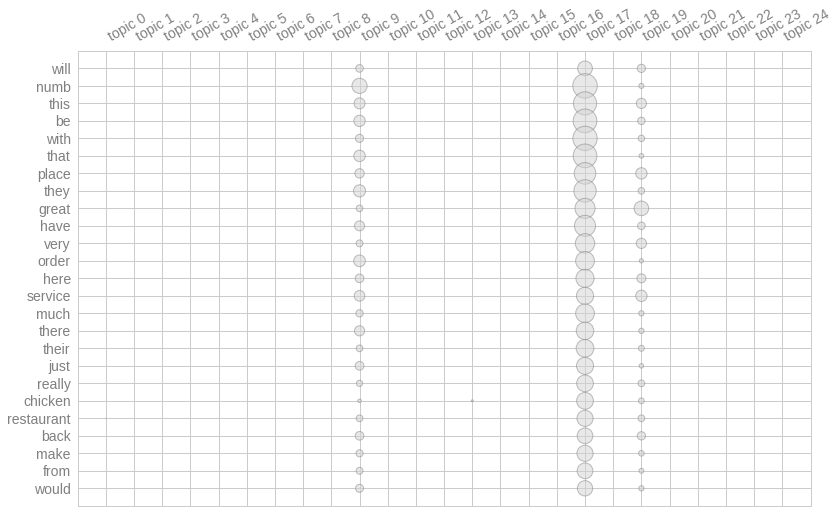

In [11]:
lda.termite_plot(doc_term_matrix, vectorizer.get_feature_names(), topics=[num for num in range(0, 25, 1)])

### LSA

In [12]:
model = textacy.TopicModel('lsa', n_topics=100)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)

/opt/conda/lib/python3.6/site-packages/matplotlib/collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


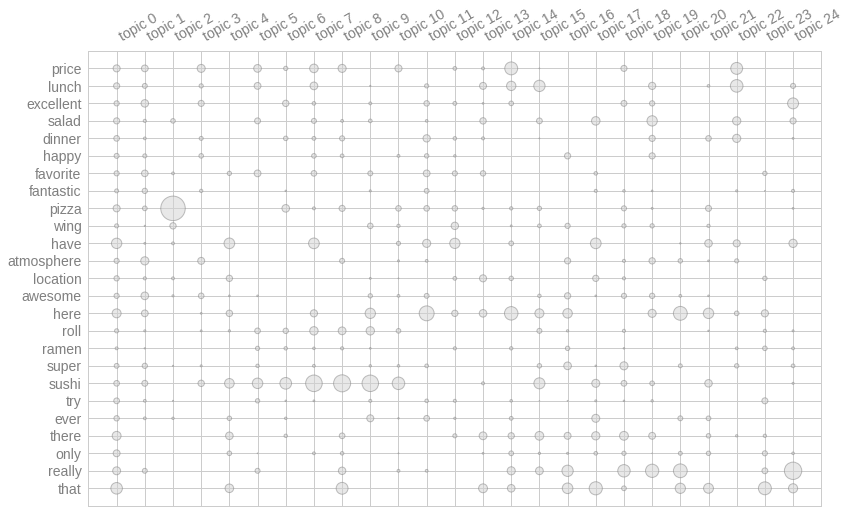

In [13]:
model.termite_plot(doc_term_matrix, vectorizer.get_feature_names(), topics=[num for num in range(0, 25, 1)])

In [14]:
model.save('../models/lsa.pkl')

In [27]:
topics_and_top_docs(model, doc_topic_matrix,  topics=[num for num in range(0, 25, 1)])

topic 0 : numb   be   that   this   they   with   place   have   great   order
topic 1 : great   place   service   friendly   very   amaze   always   staff   this   delicious
topic 2 : pizza   crust   slice   wing   cheese   topping   delivery   pepperoni   numb   order
topic 3 : numb   great   service   minute   price   atmosphere   friendly   staff   star   sushi
topic 4 : place   this   have   they   always   sushi   that   there   never   when
topic 5 : place   this   numb   chicken   sushi   fry   price   fresh   sandwich   sauce
topic 6 : very   sushi   this   restaurant   back   be   place   will   definitely   pizza
topic 7 : sushi   they   very   always   their   have   fresh   price   friendly   roll
topic 8 : sushi   great   that   much   with   price   roll   really   buffet   well
topic 9 : sushi   order   chicken   here   back   will   always   service   fry   amaze
topic 10 : burger   fry   sushi   very   burgers   friendly   they   staff   be   price
topic 11 : here   a

0
['where', 'start', '\ufeff1', 'down', 'street', 'from', 'enjoy', 'frequent', 'this', 'place', 'because', 'convenient', 'location', 'eat', 'here', 'many', 'many', 'time', 'would', 'that', 'little', 'once', 'month', 'next', 'this', 'there', 'quite', 'numb', 'other', 'sushi', 'place', 'along', 'queen', 'street', 'some', 'sketchy', 'avoid', 'them', 'much', 'presentable', 'look', 'they', 'have', 'which', 'prefer', 'which', 'another', 'reason', 'choose', 'always', 'great', 'quality', 'good', 'much', 'part', 'last', 'there', 'order', 'chicken', 'katsu', 'boyfriend', 'order', 'think', 'sweet', 'chicken', 'chicken', 'katsu', 'very', 'satisfy', 'there', 'much', 'batter', 'than', 'chicken', 'whole', 'thing', 'just', 'taste', 'fry', 'batter', 'look', 'be', 'change', 'while', 'maybe', 'look', 'sweet', 'chicken', 'be', 'fry', 'same', 'look', 'quite', 'greasy', 'speak', 'fry', 'that', 'however', 'that', 'their', 'tempura', 'great', 'because', 'always', 'shrimp', 'tempura', 'here', 'batter', 'always

1
['great', 'coffeeeeeeeee', 'great', 'service', 'very', 'place']
['this', 'place', 'great', 'great', 'service']
2
['pizza', 'dispendieuse']
['pizza']
3
['there', 'numb', 'numb', 'great', 'service']
['great', 'service', 'great', 'numb']
4
['that', 'this', 'place', 'place', 'this', 'place']
['this', 'place']
5
['this', 'place', 'numb', 'numb']
['this', 'place', 'soooooooooooooooooooooooooooooooooooooooooooooooooooooooooo', 'goooooooooooooooooooooooooood']
6
['very', 'sushi', 'place', 'will', 'definitely', 'back', 'staff', 'very', 'friendly']
['this', 'place', 'very', 'very', 'kkkkkkkkkkejdjeiwjjfnjdjwkkwjdndjskjfnjdjiwjndnndjdjsjsjdjdjd', 'jisjncn', 'jjjkskwn', 'jksjncnj', 'jjsjn', 'jkaknkck']
7
['have', 'time', 'numb', 'numb', 'price', 'sushi', 'their', 'sushi', 'very', 'limit', 'without', 'many', 'sushi', 'option', 'example', 'spicy', 'salmon', 'staple', 'every', 'sushi', 'restaurant', 'have', 'be', 'they', 'have', 'very', 'their', 'sushi', 'option', 'actually', 'have', 'disappoint', 

### NMF

In [20]:
nmf_model = textacy.TopicModel('nmf', n_topics=25)
nmf_model.fit(doc_term_matrix)
doc_topic_matrix_nmf = model.transform(doc_term_matrix)

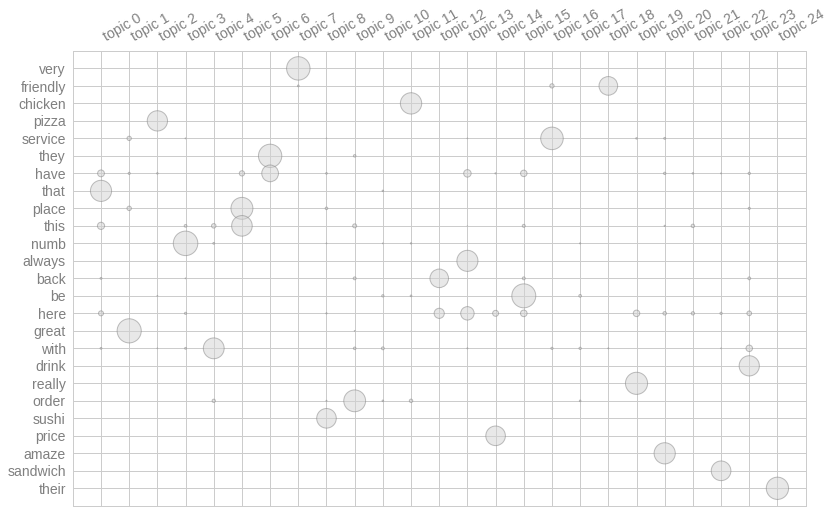

In [24]:
nmf_model.termite_plot(doc_term_matrix, vectorizer.get_feature_names(), topics=[num for num in range(0, 25, 1)])

In [25]:
topics_and_top_docs(nmf_model, doc_topic_matrix_nmf, topics=[num for num in range(0, 25, 1)])

topic 0 : that   there   much   just   what   about   would   think   when   restaurant
topic 1 : great   atmosphere   awesome   selection   place   service   happy   patio   fantastic   music
topic 2 : pizza   crust   slice   cheese   wing   topping   pepperoni   delivery   sauce   salad
topic 3 : numb   minute   star   only   about   wait   give   people   table   after
topic 4 : with   salad   sauce   which   cheese   side   delicious   also   steak   flavor
topic 5 : place   this   favorite   vega   have   from   your   look   awesome   location
topic 6 : they   have   them   also   make   your   when   close   offer   serve
topic 7 : very   tasty   clean   restaurant   attentive   also   good   fresh   small   helpful
topic 8 : sushi   roll   fresh   sashimi   salmon   japanese   quality   tempura   spicy   nigiri
topic 9 : order   minute   take   when   wait   ask   after   wrong   call   then
topic 10 : burger   fry   burgers   cheese   onion   shake   bacon   patty   ring   joi

1
['great', 'coffeeeeeeeee', 'great', 'service', 'very', 'place']
['this', 'place', 'great', 'great', 'service']
2
['pizza', 'dispendieuse']
['pizza']
3
['there', 'numb', 'numb', 'great', 'service']
['great', 'service', 'great', 'numb']
4
['that', 'this', 'place', 'place', 'this', 'place']
['this', 'place']
5
['this', 'place', 'numb', 'numb']
['this', 'place', 'soooooooooooooooooooooooooooooooooooooooooooooooooooooooooo', 'goooooooooooooooooooooooooood']
6
['very', 'sushi', 'place', 'will', 'definitely', 'back', 'staff', 'very', 'friendly']
['this', 'place', 'very', 'very', 'kkkkkkkkkkejdjeiwjjfnjdjwkkwjdndjskjfnjdjiwjndnndjdjsjsjdjdjd', 'jisjncn', 'jjjkskwn', 'jksjncnj', 'jjsjn', 'jkaknkck']
7
['have', 'time', 'numb', 'numb', 'price', 'sushi', 'their', 'sushi', 'very', 'limit', 'without', 'many', 'sushi', 'option', 'example', 'spicy', 'salmon', 'staple', 'every', 'sushi', 'restaurant', 'have', 'be', 'they', 'have', 'very', 'their', 'sushi', 'option', 'actually', 'have', 'disappoint', 

In [26]:
nmf_model.save('../models/nmf.pkl')